In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from typing import List, Dict
import warnings

# ignore matplotlib warnings
warnings.filterwarnings("ignore")

In [7]:
# function calculates the distance of an [X,Y] point to the hospital [X,Y] location 

def distHospital(
    X: np.ndarray, 
    Y: np.ndarray,
    hospital_coords: Dict
) -> np.ndarray:
    
    xCSC = np.full(shape = 100, fill_value = hospital_coords['x']) 
    yCSC = np.full(shape = 100, fill_value = hospital_coords['y'])
    distance = np.hypot(X - xCSC, Y - yCSC)
    return distance

## function to plot the map 
def plotMap(
    scale: float,
    csc_1_coords: Dict,
    psc_1_coords: Dict, 
    psc_2_coords: Dict, 
    fig_name: str
) -> None:
    
    def scale_dict(
        d: Dict, 
        scale: float
    ) -> Dict:
        return { k: v * scale for k,v in d.items() }
    
    # scale the input dicts with the value given for the scale param in the main function
    csc_1_coords = scale_dict(csc_1_coords, scale)
    psc_1_coords = scale_dict(psc_1_coords, scale)
    psc_2_coords = scale_dict(psc_2_coords, scale)
    
    # grid vectors of X, Y space 
    xlist = np.linspace(0, scale, 100)
    ylist = np.linspace(0, scale, 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.sqrt(X**2 + Y**2)
    
    dist_to_csc1 = distHospital(X,Y, csc_1_coords)
    dist_to_psc1 = distHospital(X,Y, psc_1_coords)
    dist_to_psc2 = distHospital(X,Y, psc_2_coords)
    
    
    # ndarray to store what the closest hospital is
    closest = np.full(fill_value = 0, shape = (100,100))
    ######### closest is CSC
    closest[((dist_to_csc1 < dist_to_psc1) & (dist_to_csc1 < dist_to_psc2))] = 1
    ###########closest is PSC2
    closest[(dist_to_psc2 < dist_to_psc1) & (dist_to_csc1 > dist_to_psc2)] = 2   
    ########### closest is PSC
    closest[(dist_to_psc2 > dist_to_psc1) & (dist_to_csc1 > dist_to_psc1)] = 0
    
    
    ########## plotting output ###################################################
    colors = ['lightcoral','lightgreen','lightskyblue']
    hospitals = ['PSC', 'CSC', 'PSC-2']

    plt.style.use("ggplot")
    fig,ax=plt.subplots(1,1)
    
    # set colors
    cp = ax.contourf(X,Y,closest, cmap = matplotlib.colors.ListedColormap(colors))
    
    # set axis labels
    ax.set_ylabel('y (miles)')
    ax.set_xlabel('x (miles)')
    ax.set_title('Closest Hospital')
    
    loc = np.arange(0,3)
    
    # triangle for CSC
    aug1 = plt.plot(csc_1_coords['x'], 
                    csc_1_coords['y'], 
                    'or', 
                    marker = "^", 
                    markersize = "12", 
                    label = "CSC", 
                    color = 'darkgreen')
    
    # square for PSC 1
    aug2 = plt.plot(psc_1_coords['x'], 
                    psc_1_coords['y'], 
                    'or', 
                    marker = "s", 
                    markersize = "10", 
                    label = "PSC 1",
                    color = 'darkred')
    
    # square for PSC 2
    aug2 = plt.plot(psc_2_coords['x'], 
                    psc_2_coords['y'], 
                    'or', 
                    marker = "s", 
                    markersize = "10", 
                    label = "PSC 2",
                    color = 'navy')
    # legend - bbox to anchor is the X,T position of the legend relative to the figure 
    # 1,1 is the top right corner
    leg = plt.legend(bbox_to_anchor = (1.25,1), loc = 0)
    
    plt.savefig(fname =  fig_name, bbox_inches = 'tight')
    plt.show()
    return

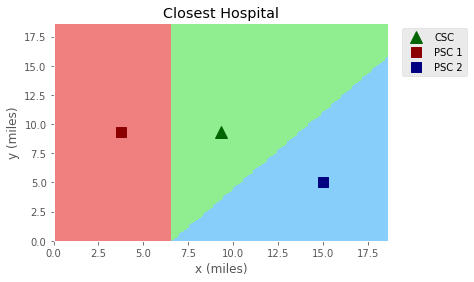

In [8]:
csc_1 = {
    'x': .5,
    'y': .5
}
psc_1 = {
    'x': .2,
    'y': .5
}
psc_2 = {
    'x': .8047,
    'y': .2682
}

plotMap(
    scale = 18.64,
    csc_1_coords = csc_1,
    psc_1_coords = psc_1,
    psc_2_coords = psc_2,
    fig_name = 'closest_hospital_map'
    )